In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
data.shape

(8522, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8522 entries, 0 to 8521
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8522 non-null   object 
 1   Item_Weight                7059 non-null   float64
 2   Item_Fat_Content           8522 non-null   object 
 3   Item_Visibility            8522 non-null   float64
 4   Item_Type                  8522 non-null   object 
 5   Item_MRP                   8522 non-null   float64
 6   Outlet_Identifier          8522 non-null   object 
 7   Outlet_Establishment_Year  8522 non-null   int64  
 8   Outlet_Size                6112 non-null   object 
 9   Outlet_Location_Type       8522 non-null   object 
 10  Outlet_Type                8522 non-null   object 
 11  Item_Outlet_Sales          8522 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [7]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(0)

# Filling Missing Value

In [9]:
# Numerical -> mean , Item_Weight  
# Categorical-> mode, Outlet_Size

In [10]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)

In [11]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [13]:
data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [14]:
data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [15]:
mode_of_outlet_size = data.pivot_table(values='Outlet_Size', columns = 'Outlet_Type', aggfunc = lambda x : x.mode()[0])

In [16]:
mode_of_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [17]:
missing_value = data['Outlet_Size'].isnull()

In [18]:
missing_value.value_counts()

Outlet_Size
False    6112
True     2410
Name: count, dtype: int64

In [19]:
missing_value = data['Outlet_Size'].isnull()
data.loc[missing_value, 'Outlet_Size'] = data.loc[missing_value, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

In [20]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [21]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8522.000000,8522.000000,8522.000000,8522.000000,8522.000000
mean,12.857370,0.066135,141.000471,1997.831964,2181.455027
std,4.226319,0.051600,62.274675,8.372247,1706.530835
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026988,93.844250,1987.000000,834.913200
50%,12.857370,0.053935,143.014100,1999.000000,1794.331000
75%,16.000000,0.094594,185.652250,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Exploratory Data Analysis

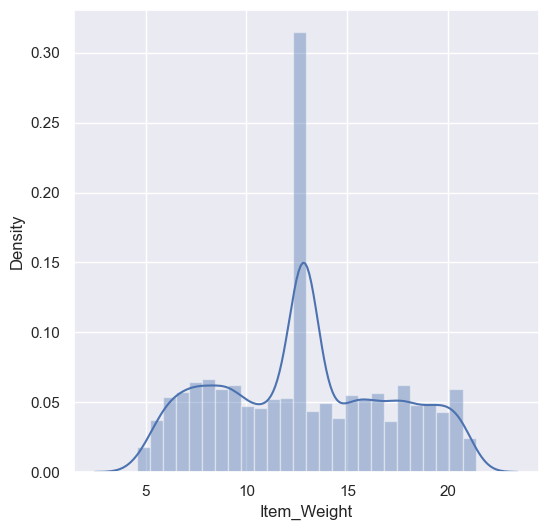

In [22]:
# Item_Weight Distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['Item_Weight'])
plt.show()

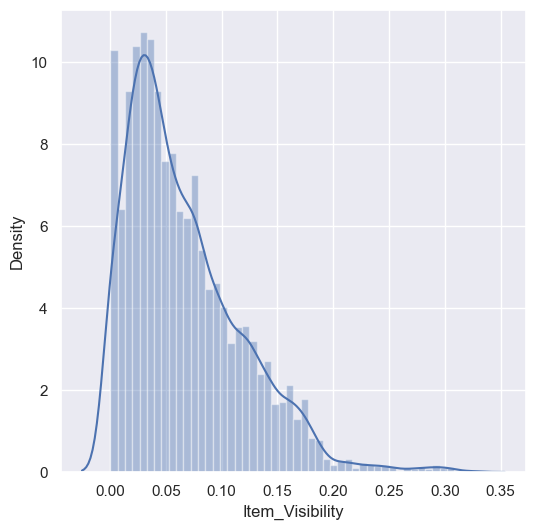

In [23]:
# Item_Visibility Distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['Item_Visibility'])
plt.show()

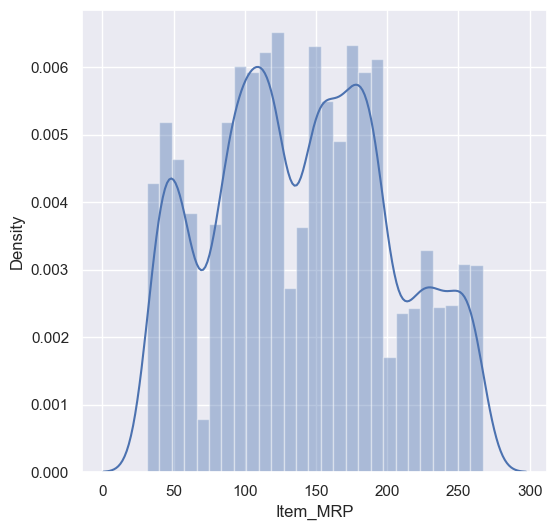

In [24]:
# Item_MRP Distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['Item_MRP'])
plt.show()

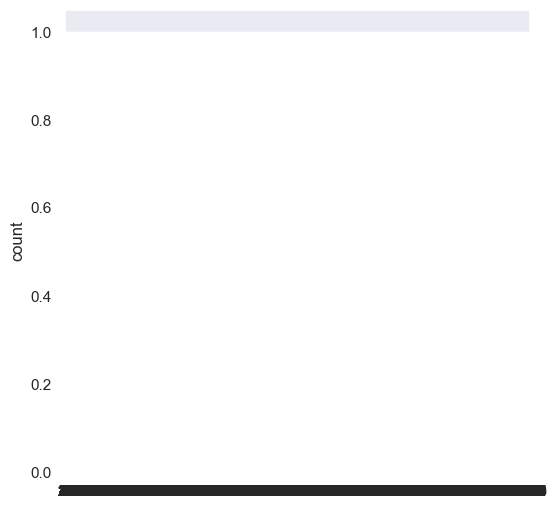

In [25]:
# Outlet_Establishment_Year Count
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(data['Outlet_Establishment_Year'])
plt.show()

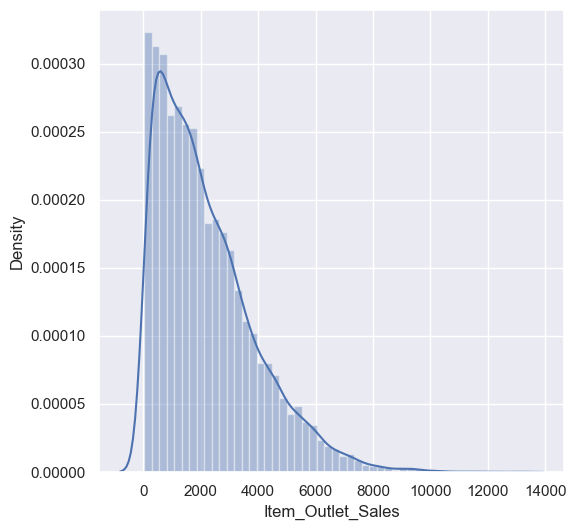

In [26]:
# Item_Outlet_Sales Distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['Item_Outlet_Sales'])
plt.show()

In [27]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [28]:
data.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

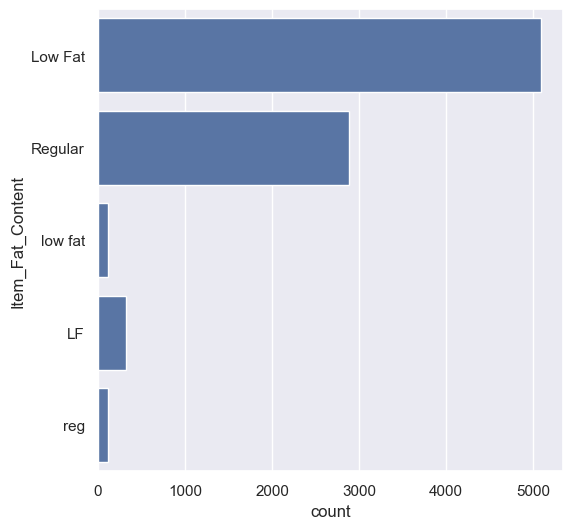

In [29]:
# Item_Fat_Content Count
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(data['Item_Fat_Content'])
plt.show()

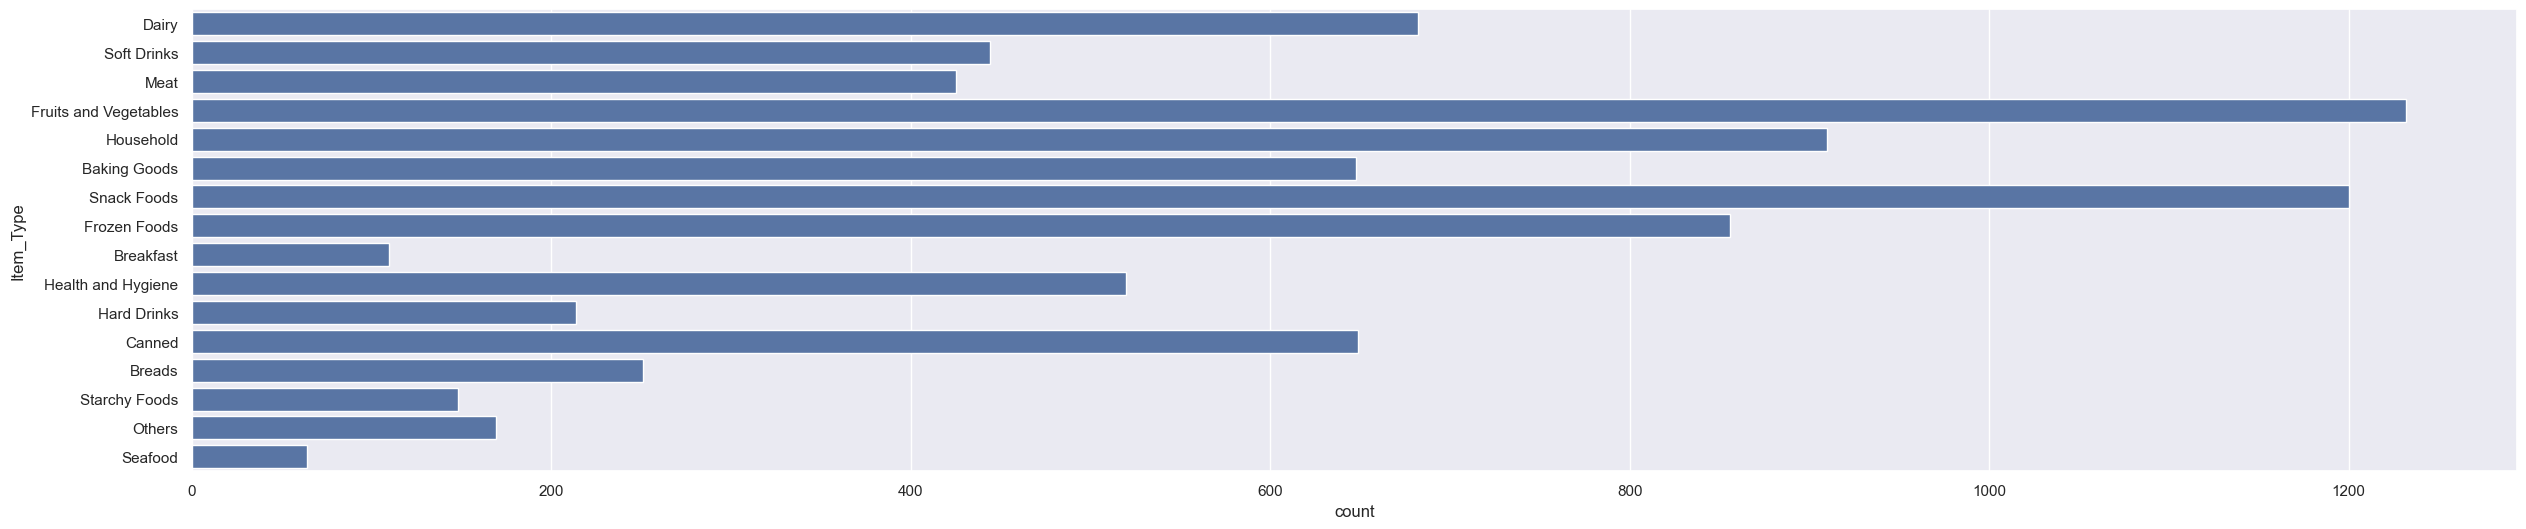

In [30]:
# Item_Type Count
sns.set()
plt.figure(figsize=(30,6))
sns.countplot(data['Item_Type'])
plt.show()

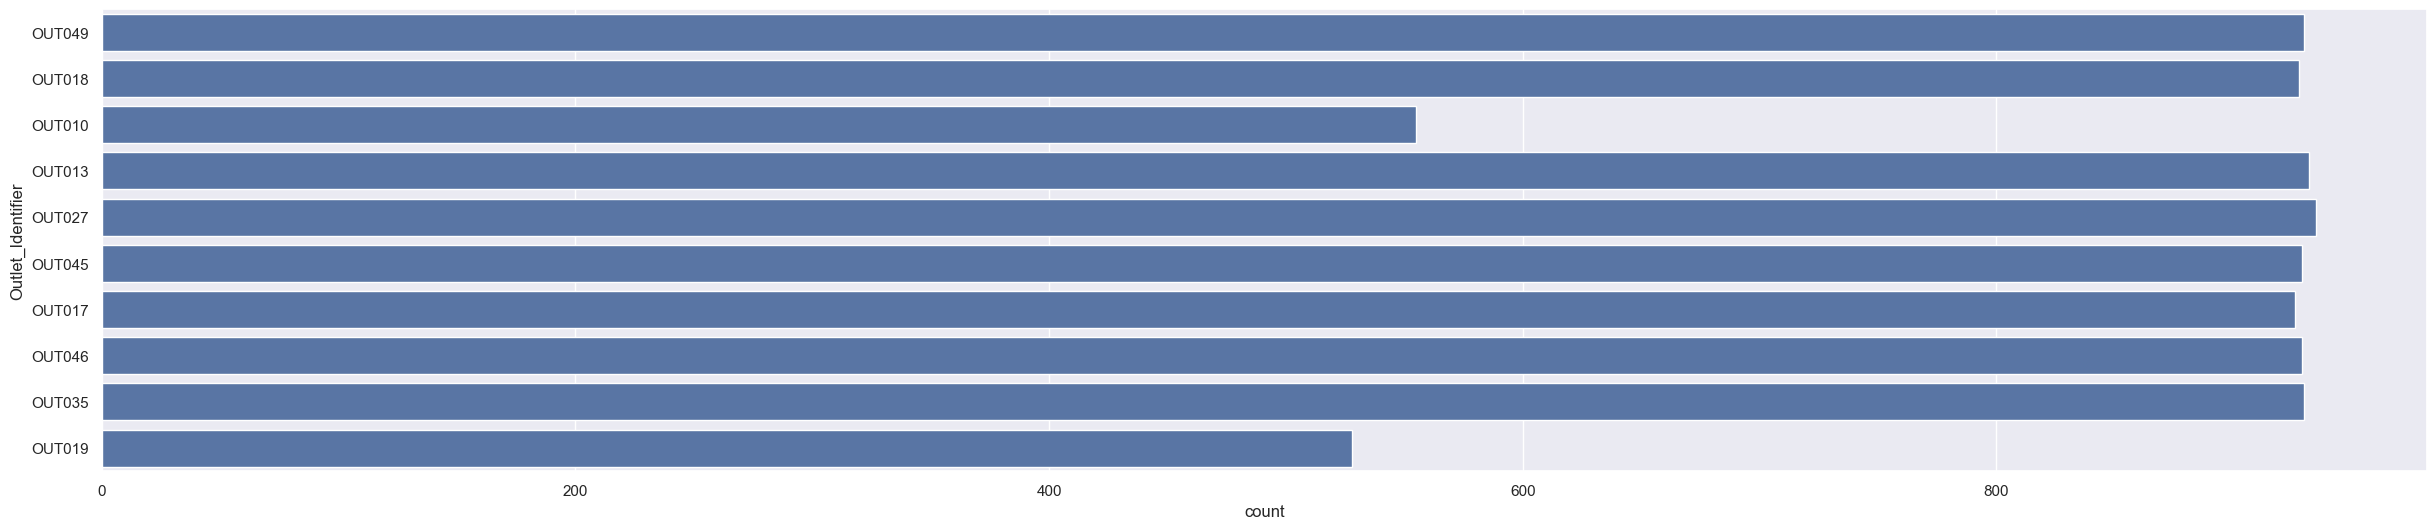

In [31]:
# Outlet_Identifier Count
sns.set()
plt.figure(figsize=(30,6))
sns.countplot(data['Outlet_Identifier'])
plt.show()

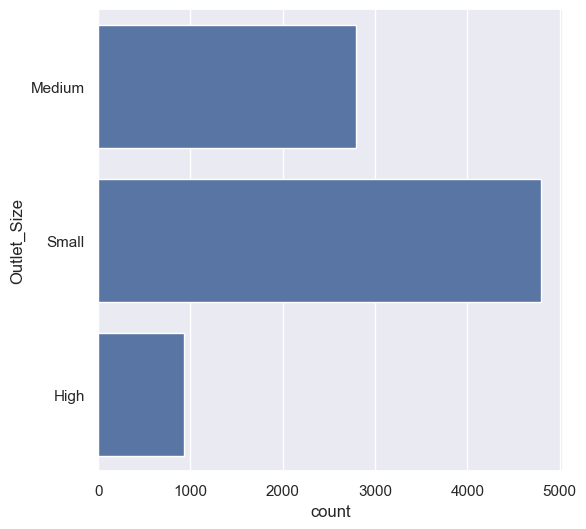

In [32]:
# Outlet_Size Count
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(data['Outlet_Size'])
plt.show()

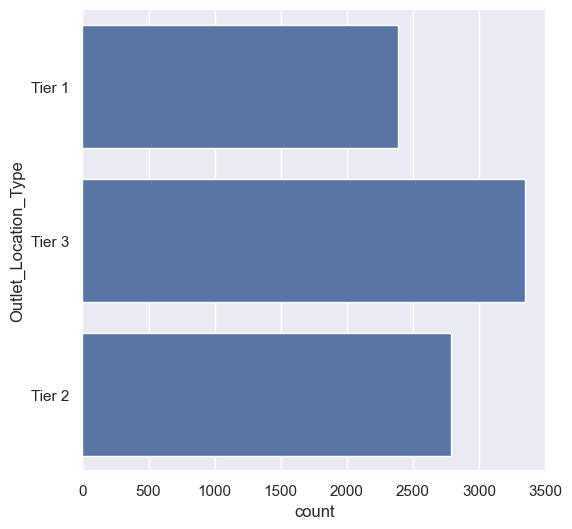

In [33]:
# Outlet_Location_Type Count
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(data['Outlet_Location_Type'])
plt.show()

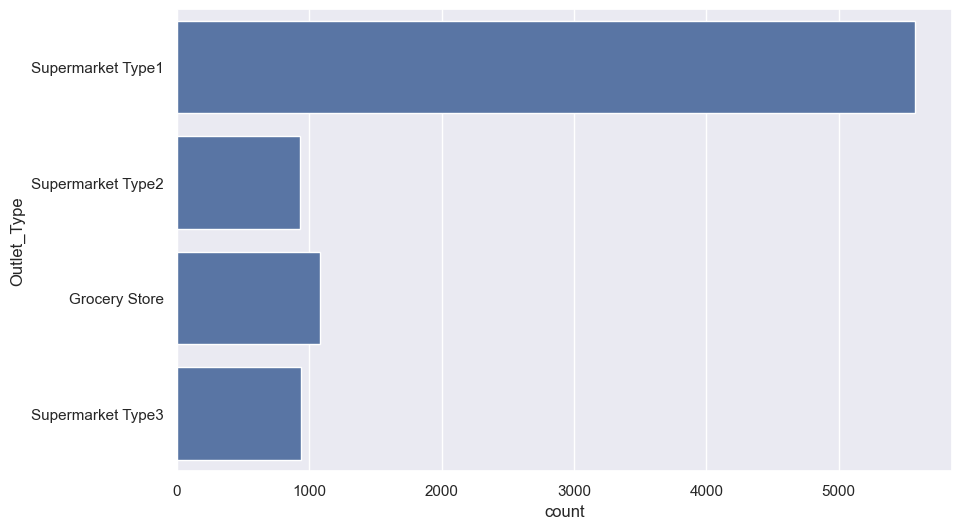

In [34]:
# Outlet_Type Count
sns.set()
plt.figure(figsize=(10,6))
sns.countplot(data['Outlet_Type'])
plt.show()

In [35]:
data.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg':'Regular'}}, inplace=True)

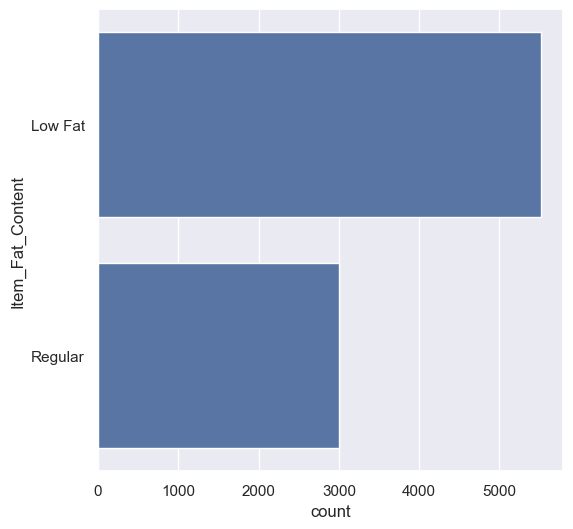

In [36]:
# Item_Fat_Content Count
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(data['Item_Fat_Content'])
plt.show()

In [37]:
data.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

# Label Encoder

In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [39]:
encoder = LabelEncoder()

In [40]:
data['Item_Identifier']  = encoder.fit_transform(data['Item_Identifier'])
data['Item_Fat_Content']  = encoder.fit_transform(data['Item_Fat_Content'])
data['Item_Type']  = encoder.fit_transform(data['Item_Type'])
data['Outlet_Identifier']  = encoder.fit_transform(data['Outlet_Identifier'])
data['Outlet_Size']  = encoder.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type']  = encoder.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type']  = encoder.fit_transform(data['Outlet_Type'])

In [54]:
from sklearn.preprocessing import LabelEncoder

# Dictionary to store encoders for each column
encoders = {}

# Encode categorical columns separately
for col in ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 
            'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']:
    encoders[col] = LabelEncoder()  # Create a new LabelEncoder for each column
    data[col] = encoders[col].fit_transform(data[col])

print("✅ Encoding completed successfully!")


✅ Encoding completed successfully!


In [55]:
import pickle

# Save encoders
with open("encoder.pkl", "wb") as f:
    pickle.dump(encoders, f)

print("✅ Label Encoders saved successfully!")


✅ Label Encoders saved successfully!


In [41]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# Spliting data into train & test part

In [42]:
X = data.drop(columns = 'Item_Outlet_Sales', axis = 1)
y = data['Item_Outlet_Sales']

In [43]:
X.shape

(8522, 11)

In [44]:
y.shape

(8522,)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [46]:
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [47]:
metrics.r2_score(y_test, y_pred)

0.5165527878383627

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8522 entries, 0 to 8521
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8522 non-null   int64  
 1   Item_Weight                8522 non-null   float64
 2   Item_Fat_Content           8522 non-null   int64  
 3   Item_Visibility            8522 non-null   float64
 4   Item_Type                  8522 non-null   int64  
 5   Item_MRP                   8522 non-null   float64
 6   Outlet_Identifier          8522 non-null   int64  
 7   Outlet_Establishment_Year  8522 non-null   int64  
 8   Outlet_Size                8522 non-null   int64  
 9   Outlet_Location_Type       8522 non-null   int64  
 10  Outlet_Type                8522 non-null   int64  
 11  Item_Outlet_Sales          8522 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 799.1 KB


In [49]:
data.sample(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3828,593,16.85000,0,0.036383,13,91.0488,6,2004,2,1,1,1086.5856
5862,1308,12.85737,0,0.173574,9,214.0902,4,1985,2,0,0,1061.9510
1361,1146,9.69500,1,0.129009,0,226.9404,2,2007,2,1,1,2700.4848
2877,481,19.10000,0,0.038564,6,209.2586,8,1997,2,0,1,3165.8790


In [50]:
input1 = (743,18.600,0,0.039356,5,246.3802,9,1999,1,0,1)
new_input = np.asanyarray(input1, dtype = float)
prediction = model.predict(new_input.reshape(1, -1))
print(prediction)

[6364.159]


In [51]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

In [52]:
import xgboost
print(xgboost.__version__)


3.0.0
